In [7]:
import numpy as np
import pandas as pd
np.random.seed(0)

# Generate synthetic data
num_samples = 100

# CGPA values between 6 and 10 (assuming a scale of 10)
cgpa = np.random.uniform(6.0, 10.0, num_samples)

# Generate package values with some random noise
# Assuming a base linear relationship: package = 10 * cgpa + random_noise
package = 10 * cgpa + np.random.randn(num_samples) * 2  # Adding some noise

# Create a DataFrame
df = pd.DataFrame({
    'CGPA': cgpa,
    'Package': package
})



In [2]:
df.head()

,CGPA,Package
0,8.195254,79.622240
1,8.860757,90.409228
2,8.411054,85.041860
3,8.179533,78.722840
4,7.694619,79.922696


Text(0, 0.5, 'Package(in lpa)')

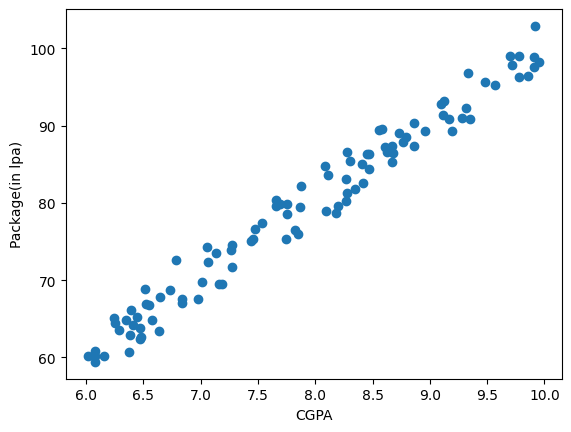

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['CGPA'],df['Package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [6]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [7]:
X

,CGPA
0,8.195254
1,8.860757
2,8.411054
3,8.179533
4,7.694619
...,...
95,6.732765
96,8.346052
97,6.080430
98,9.315760


In [8]:
y

0     79.622240
1     90.409228
2     85.041860
3     78.722840
4     79.922696
        ...    
95    68.690844
96    81.853698
97    59.425202
98    92.246536
99    60.222777
Name: Package, Length: 100, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3 ,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
LR  = LinearRegression()

In [12]:
LR.fit(X_train,y_train)

LinearRegression()

In [13]:
X_test

,CGPA
83,8.769888
30,7.058222
56,8.612433
24,6.473098
16,6.080874
23,9.122117
2,8.411054
27,9.778676
28,8.087393
13,9.702387


In [14]:
y_test

83    87.873987
30    74.317342
56    87.277515
24    62.384730
16    60.829736
23    93.159960
2     85.041860
27    96.291847
28    84.719817
13    98.977144
99    60.222777
92    66.985576
76    73.565550
14    63.554175
0     79.622240
21    89.270824
3     78.722840
29    79.547507
61    65.293789
79    63.873469
35    86.310333
11    83.600687
84    80.213187
44    85.281533
73    82.540944
5     89.627543
25    89.484083
77    62.647999
74    89.373638
62    86.586531
Name: Package, dtype: float64

In [22]:
LR.predict(X_test.iloc[2].values.reshape(1,1))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([86.43797607])

Text(0, 0.5, 'Package')

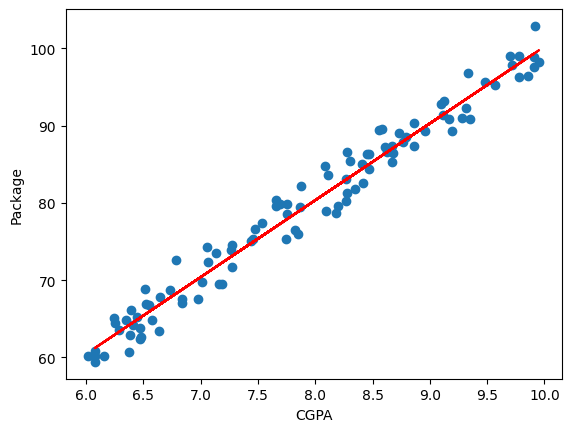

In [26]:
plt.scatter(df['CGPA'],df['Package'])
plt.plot(X_train,LR.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')

In [27]:
m = LR.coef_

In [28]:
b = LR.intercept_

In [3]:
from sklearn.datasets import make_regression
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [5]:
X,y  = make_regression(n_samples=100,n_features =2,n_informative=2,n_targets=1,noise=0.5)

In [10]:
df = pd.DataFrame({'feature1': X[:,0],'feature2':X[:,1],'target':y})

In [12]:
df.shape

(100, 3)

In [13]:
df.head()

,feature1,feature2,target
0,-1.374951,-0.353994,-58.021949
1,0.232181,0.156507,15.125389
2,1.020173,-0.110541,22.045046
3,2.256723,-0.157667,53.610587
4,0.097400,-0.310886,-14.045925


In [14]:
fig = px.scatter_3d(df,x='feature1',y='feature2',z='target')
fig.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [17]:
from sklearn.linear_model import LinearRegression


In [18]:
lr =LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_test)

In [21]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2_score",r2_score(y_test,y_pred))

MAE 0.4257796064938265
MSE 0.27120401979712166
R2_score 0.9999102876093227


In [30]:
lr.coef_

array([27.26457609, 55.26077373])

In [31]:
lr.intercept_

-0.05200997229027138

In [1]:
from sklearn.datasets import load_diabetes

In [3]:
X,y = load_diabetes(return_X_y=True)

In [4]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [6]:
X.shape

(442, 10)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
from sklearn.linear_model import LinearRegression

In [13]:
lr2 = LinearRegression()

In [15]:
lr2.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred =lr2.predict(X_test)

In [17]:
from sklearn.metrics import r2_score

In [19]:
print(r2_score(y_test,y_pred))

0.4399338661568968


In [21]:
lr2.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [22]:
lr2.intercept_

151.88331005254167

In [30]:
import numpy as np
class Mylr:
    def __init__(self):
        self.coef_ =None
        self.intercept_ =None
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        beta = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

In [31]:
lr = Mylr()

In [32]:
lr.fit(X_train,y_train)

In [34]:
np.insert(X_train,0,1,axis=1).shape

(353, 11)

In [35]:
lr.predict(X_test)

array([154.1213881 , 204.81835118, 124.93755353, 106.08950893,
       258.5348576 , 256.3310074 , 118.75087616, 119.52440696,
       101.50816735, 190.54048661, 141.70656811, 172.51883961,
       174.33861649, 134.80942706, 294.13994537,  94.11798038,
       211.97059795, 156.49579378, 134.21000428, 119.62664644,
       148.87842251, 165.00873409, 151.10021038, 176.04063756,
       133.27769647, 221.29555392, 197.17324941,  96.1577688 ,
        50.26012711, 230.48580317, 242.06073866, 114.11129218,
        67.07532417,  94.52943825, 201.21415375, 167.05136201,
       159.881268  , 192.78746659, 114.49551325, 233.48234551,
       140.82563045, 121.0680409 , 192.27480772, 191.12738845,
       179.16865788, 148.34935601, 163.47414622, 276.81647884,
       100.17926432, 164.10555298, 255.80762189, 136.9466204 ,
       152.37503699, 107.92237882, 194.21924678,  77.34670792,
       118.50482479,  68.38335763, 154.29258529, 162.48840259,
       168.36788326, 156.87790322,  97.14191797, 238.16

In [36]:
y_pred = lr.predict(X_test)

In [37]:
r2_score(y_test,y_pred)

0.43993386615689634

In [43]:
lr.intercept_

151.88331005254165

In [44]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])